## Load the dataset 
(data source: https://www.kaggle.com/datasets/lokeshparab/amazon-products-dataset)

In [1]:
import os
import pandas as pd

data_dir = 'archive'

file_list = [os.path.join(data_dir, file) for file in os.listdir(data_dir) if file.endswith('.csv')]

print(f'Found {len(file_list)} files')

all_data = []
for file in file_list:
    # Read each CSV file
    product_data = pd.read_csv(file)

    product_name = os.path.basename(file).replace('.csv', '')
    product_data['product_name'] = product_name

    all_data.append(product_data)

combined_df = pd.concat(all_data, ignore_index=True)

combined_df.to_csv('combined_product_data_2023.csv', index=False)

print('All files have been combined into a single DataFrame')

Found 140 files
All files have been combined into a single DataFrame


## Inspect the data

In [2]:
print("Shape:", combined_df.shape)
print("Columns:", combined_df.columns)

# check the data types and non-null values
combined_df.info()

missing_values = combined_df.isnull().sum()
print("Missing values:", missing_values)

print("Summary statistics:", combined_df.describe())

combined_df.head()

Shape: (1103170, 11)
Columns: Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price', 'product_name',
       'Unnamed: 0'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103170 entries, 0 to 1103169
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   name            1103170 non-null  object 
 1   main_category   1103170 non-null  object 
 2   sub_category    1103170 non-null  object 
 3   image           1103170 non-null  object 
 4   link            1103170 non-null  object 
 5   ratings         751582 non-null   object 
 6   no_of_ratings   751582 non-null   object 
 7   discount_price  980844 non-null   object 
 8   actual_price    1067544 non-null  object 
 9   product_name    1103170 non-null  object 
 10  Unnamed: 0      551585 non-null   float64
dtypes: float64(1), object(10)
memory usage: 92.6+ M

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,product_name,Unnamed: 0
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990",Air Conditioners,NaN
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990",Air Conditioners,NaN
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990",Air Conditioners,NaN
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990",Air Conditioners,NaN
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790",Air Conditioners,NaN


## Data cleaning

In [3]:
combined_df = combined_df.drop(columns=['Unnamed: 0'])

# remove currency symbols and commas
for col in ['discount_price', 'actual_price']:
    combined_df[col] = combined_df[col].str.replace('₹', '').str.replace(',', '', regex=False)

combined_df['no_of_ratings'] = combined_df['no_of_ratings'].str.replace(',', '', regex=False)
combined_df['discount_price'] = pd.to_numeric(combined_df['discount_price'], errors='coerce')
combined_df['actual_price'] = pd.to_numeric(combined_df['actual_price'], errors='coerce')
combined_df['ratings'] = pd.to_numeric(combined_df['ratings'], errors='coerce')
combined_df['no_of_ratings'] = pd.to_numeric(combined_df['no_of_ratings'], errors='coerce')

if combined_df['product_name'].equals(combined_df['sub_category']):
    combined_df = combined_df.drop(columns=['product_name'])

combined_df = combined_df.drop_duplicates()

print("DataFrame info after cleaning:")
combined_df.info()

print(combined_df.head())

DataFrame info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103170 entries, 0 to 1103169
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   name            1103170 non-null  object 
 1   main_category   1103170 non-null  object 
 2   sub_category    1103170 non-null  object 
 3   image           1103170 non-null  object 
 4   link            1103170 non-null  object 
 5   ratings         739116 non-null   float64
 6   no_of_ratings   739053 non-null   float64
 7   discount_price  980844 non-null   float64
 8   actual_price    1067544 non-null  float64
 9   product_name    1103170 non-null  object 
dtypes: float64(4), object(6)
memory usage: 84.2+ MB
                                                name main_category  \
0  Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...    appliances   
1  LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...    appliances   
2  LG 1 Ton 4 Star Ai Dual In

## Data exploration

             ratings  no_of_ratings  discount_price  actual_price
count  739116.000000  739053.000000    9.808440e+05  1.067544e+06
mean        3.832311     840.847039    2.623161e+03  2.311128e+04
std         0.756101    8651.895695    9.458191e+03  1.355081e+07
min         1.000000       1.000000    8.000000e+00  0.000000e+00
25%         3.500000       4.000000    3.890000e+02  9.900000e+02
50%         3.900000      20.000000    6.790000e+02  1.599000e+03
75%         4.300000     133.000000    1.399000e+03  2.999000e+03
max         5.000000  589547.000000    1.249990e+06  9.900000e+09


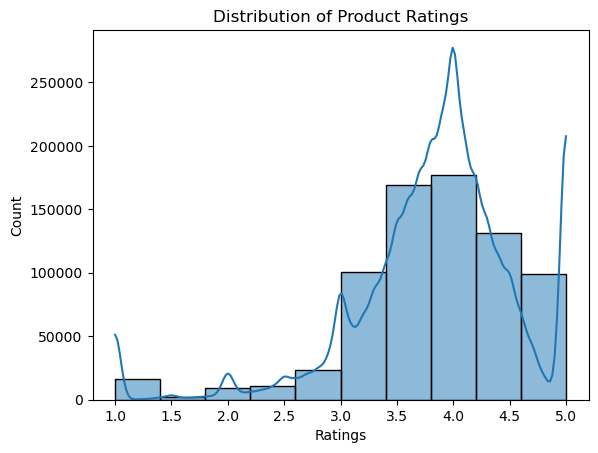

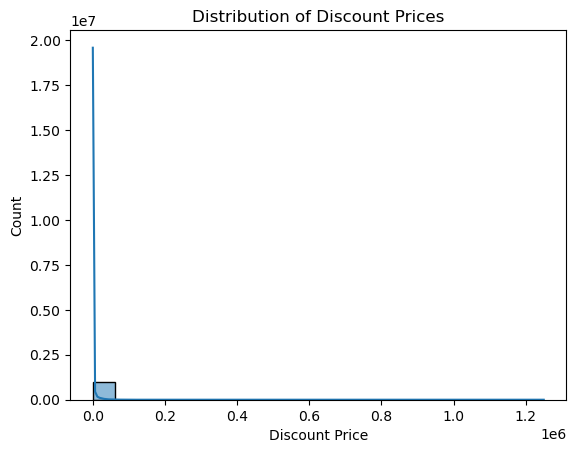

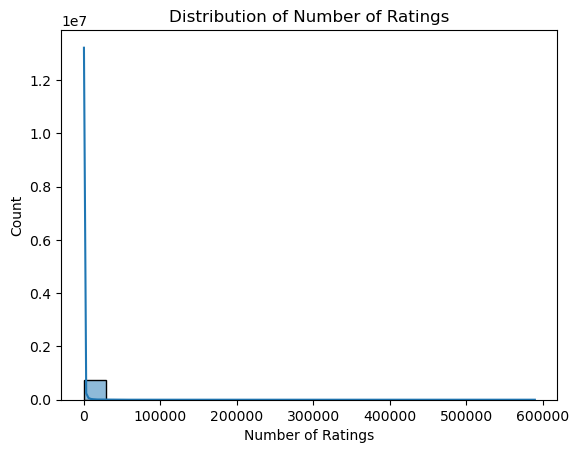

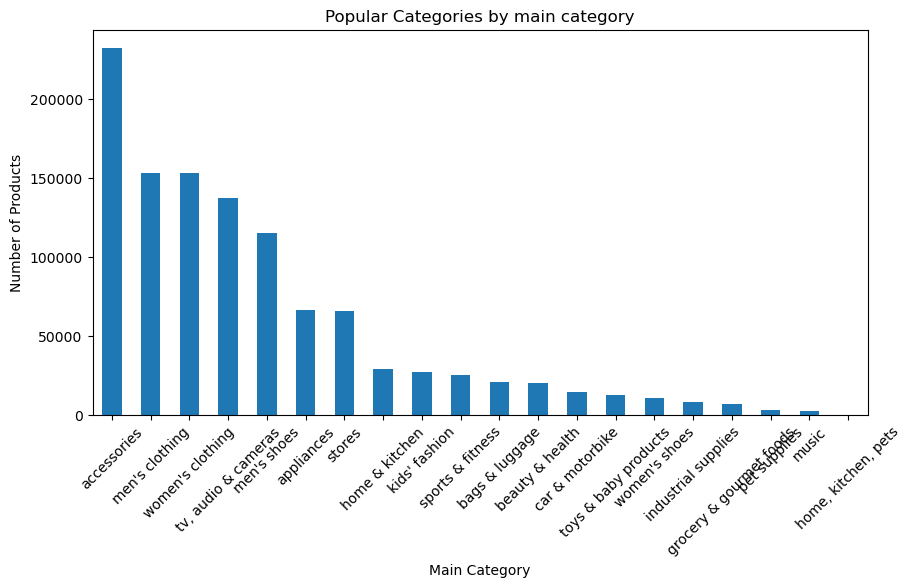

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

print(combined_df.describe())

# Distribution of product ratings
sns.histplot(combined_df['ratings'], bins=10, kde=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

# Distribution of discount prices
sns.histplot(combined_df['discount_price'], bins=20, kde=True)
plt.title('Distribution of Discount Prices')
plt.xlabel('Discount Price')
plt.ylabel('Count')
plt.show()

# Numbe of ratings distribution
sns.histplot(combined_df['no_of_ratings'], bins=20, kde=True)
plt.title('Distribution of Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

# Popular categories by product count
category_counts = combined_df['main_category'].value_counts()
category_counts.plot(kind='bar', figsize=(10, 5))
plt.title('Popular Categories by main category')
plt.xlabel('Main Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()


## Inspect outliers

Number of outliers with high discount price: 9808
                                                 name  discount_price  \
1   LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...         46490.0   
11  Daikin 1.5 Ton 5 Star Inverter Split AC (Coppe...         44990.0   
12  Panasonic 1.5 Ton 5 Star Wi-Fi Inverter Smart ...         45990.0   
13  Carrier 1.5 Ton 5 Star AI Flexicool Inverter S...         41999.0   
22  LG 1.5 Ton 4 Star AI DUAL Inverter Split AC (C...         42490.0   

    actual_price  ratings  no_of_ratings  
1        75990.0      4.2         2948.0  
11       67200.0      4.1          730.0  
12       63400.0      4.3         5073.0  
13       78490.0      4.0          568.0  
22       71990.0      4.0          258.0  


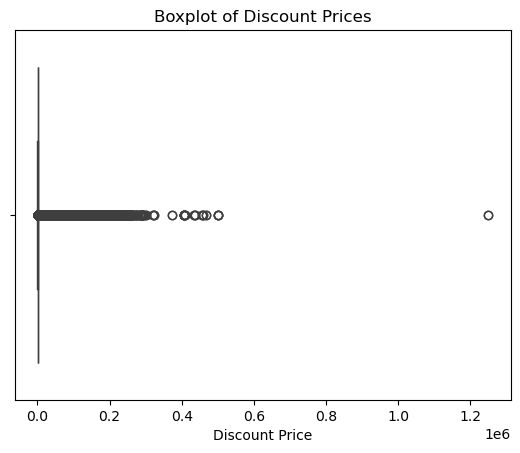

In [5]:
high_price_threshold = combined_df['discount_price'].quantile(0.99)

outliers_high_discount_price = combined_df[combined_df['discount_price'] > high_price_threshold]

print(f"Number of outliers with high discount price: {len(outliers_high_discount_price)}")
print(outliers_high_discount_price[['name', 'discount_price', 'actual_price', 'ratings', 'no_of_ratings']].head())

sns.boxplot(x=combined_df['discount_price'])
plt.title('Boxplot of Discount Prices')
plt.xlabel('Discount Price')
plt.show()

In [6]:
extreme_outliers = combined_df[combined_df['discount_price'] > 400000]
print(extreme_outliers[['name', 'discount_price', 'actual_price', 'ratings', 'no_of_ratings']])

outlier_categories = outliers_high_discount_price['main_category'].value_counts()
print("Outliers by Main Category:\n", outlier_categories)

                                                      name  discount_price  \
178250   Venus Gems Gallery Real Diamond Ring 2 Carat O...        499999.0   
226216   PC Jeweller 18k (750) Yellow Gold and Solitair...        468012.0   
339338   Dine Gems Precious White D Colour Diamond Ston...        434999.0   
339374   Venus Gems Gallery Real Diamond Ring 2 Carat O...        499999.0   
339512   USPTO 2.85 Carat Real GIA Certifed Diamond Loo...        459999.0   
340701   USPTO डायमंड वन स्टोन D Colour Genuine 3 Carat...        406009.0   
357955   Alaska Gems Gallery Colombian Panna 8 Ratti 7....        435999.0   
363015   USPTO डायमंड वन स्टोन D Colour Genuine 3 Carat...        406009.0   
419071   USPTO डायमंड वन स्टोन D Colour Genuine 3 Carat...        406009.0   
419103   USPTO डायमंड वन स्टोन D Colour Genuine 3 Carat...        406009.0   
527359   Sony Bravia 195 cm (77 inches) XR Series 4K Ul...        455990.0   
527563   Samsung 189 cm (75 inches) 4K Ultra HD Smart N...      

## Handling missing values

In [7]:
combined_df['ratings'] = combined_df['ratings'].fillna(
    combined_df.groupby('main_category')['ratings'].transform('median')
)

combined_df['no_of_ratings'] = combined_df['no_of_ratings'].fillna(0)

print("Missing values after imputation:\n", combined_df.isnull().sum())

Missing values after imputation:
 name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings                0
no_of_ratings          0
discount_price    122326
actual_price       35626
product_name           0
dtype: int64


## Handle extreme outliers

In [8]:
discount_price_cap = combined_df['discount_price'].quantile(0.999)
actual_price_cap = combined_df['actual_price'].quantile(0.999)

combined_df['discount_price'] = combined_df['discount_price'].clip(upper=discount_price_cap)
combined_df['actual_price'] = combined_df['actual_price'].clip(upper=actual_price_cap)

combined_df['is_luxury'] = combined_df['discount_price'] > 400000

print('Discount Price Cap:', discount_price_cap)
print('Actual Price Cap:', actual_price_cap)
print('Number of luxury products:', combined_df['is_luxury'].sum())

Discount Price Cap: 116279.0
Actual Price Cap: 145953.61900001136
Number of luxury products: 0


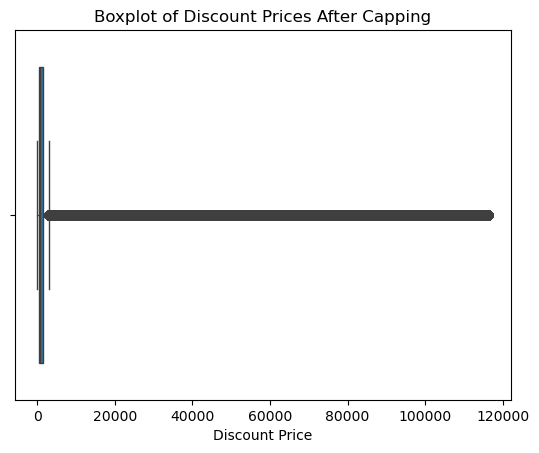

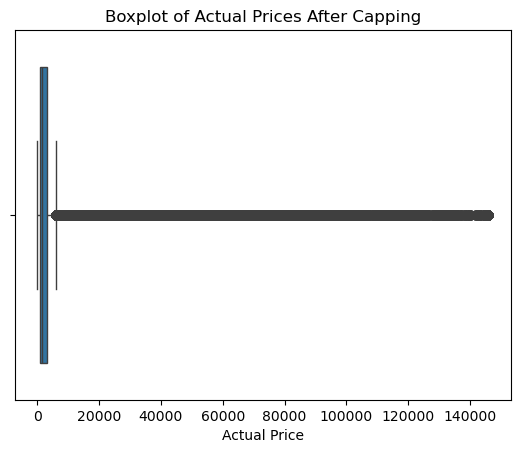

In [9]:
# Boxplot for Discount Prices After Handling
sns.boxplot(x=combined_df['discount_price'])
plt.title("Boxplot of Discount Prices After Capping")
plt.xlabel("Discount Price")
plt.show()

# Boxplot for Actual Prices After Handling
sns.boxplot(x=combined_df['actual_price'])
plt.title("Boxplot of Actual Prices After Capping")
plt.xlabel("Actual Price")
plt.show()


In [10]:
luxury_products = combined_df[combined_df['is_luxury']]
print("Luxury Products:\n", luxury_products[['name', 'main_category', 'discount_price', 'actual_price']].head())


Luxury Products:
 Empty DataFrame
Columns: [name, main_category, discount_price, actual_price]
Index: []


In [11]:
# Impute missing discount_price with median per main_category
combined_df['discount_price'] = combined_df['discount_price'].fillna(
    combined_df.groupby('main_category')['discount_price'].transform('median')
)

# Impute missing actual_price with median per main_category
combined_df['actual_price'] = combined_df['actual_price'].fillna(
    combined_df.groupby('main_category')['actual_price'].transform('median')
)

# Verify missing values
print("Remaining Missing Values After Imputation:\n", combined_df.isnull().sum())


Remaining Missing Values After Imputation:
 name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
product_name      0
is_luxury         0
dtype: int64


## Category-level analysis

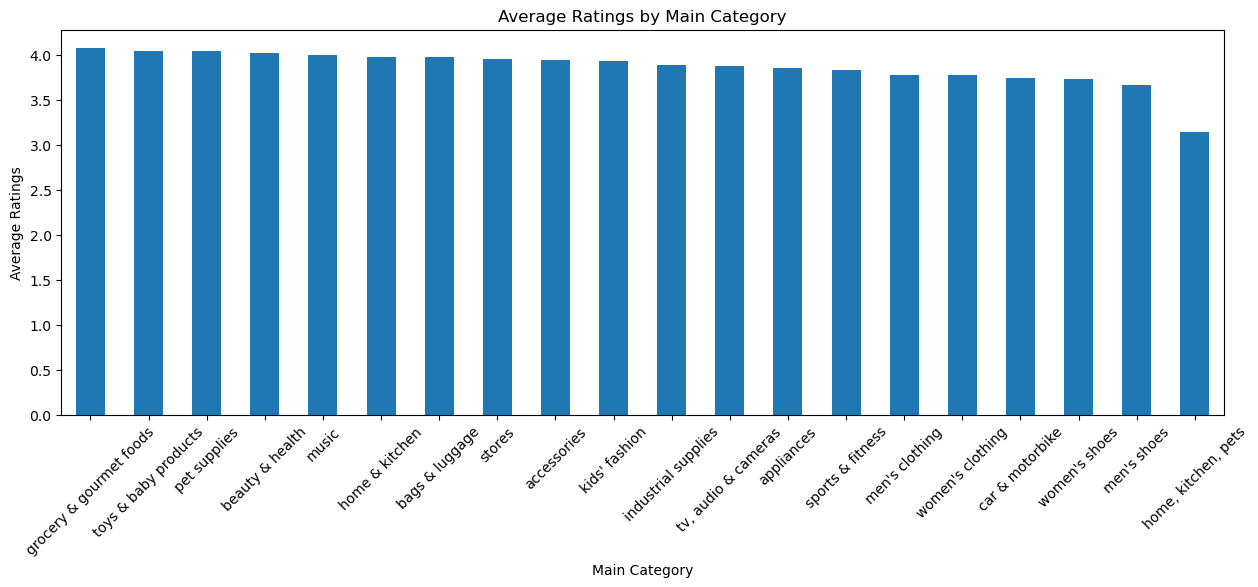

In [12]:
# Average Ratings by Main Category
avg_ratings_by_category = combined_df.groupby('main_category')['ratings'].mean().sort_values(ascending=False)

avg_ratings_by_category.plot(kind='bar', figsize=(15, 5))
plt.title('Average Ratings by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Average Ratings')
plt.xticks(rotation=45)
plt.show()

 Average Ratings by Main Category
Top Categories:
Grocery & Gourmet Foods, Toys & Baby Products, and Pet Supplies have the highest average ratings, all above 4.0.
These categories likely consist of essential or high-quality products that satisfy customer needs.
Lowest Category:
Home, Kitchen, Pets has the lowest average rating (~3.14). This might indicate inconsistent quality or customer dissatisfaction in this category.

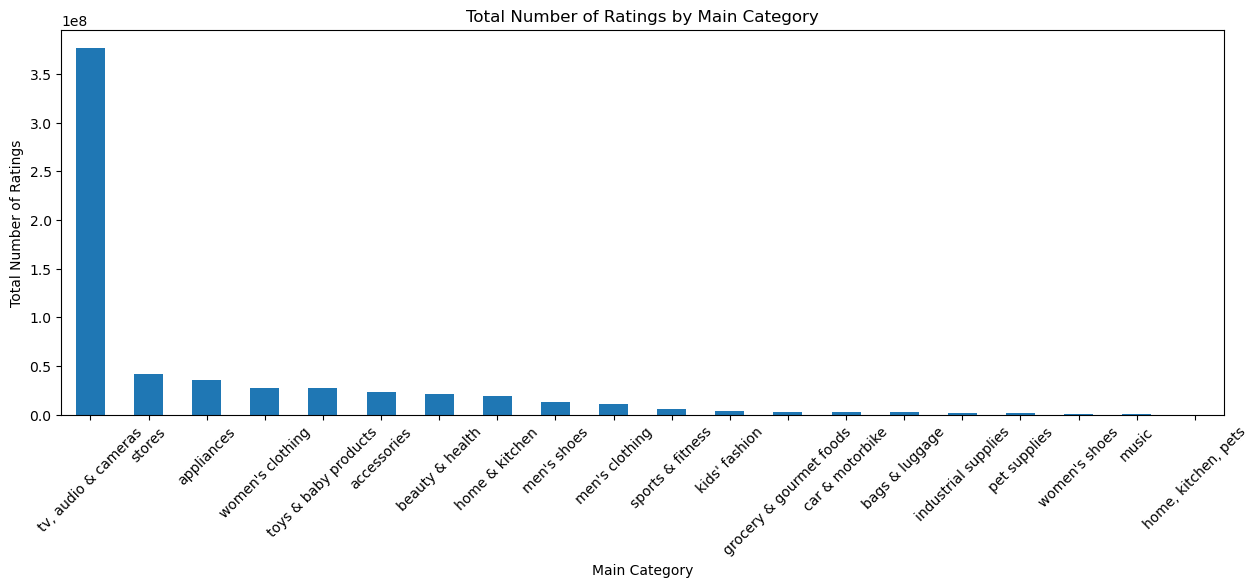

In [13]:
# Total number of ratings by Main Category
total_ratings_by_category = combined_df.groupby('main_category')['no_of_ratings'].sum().sort_values(ascending=False)

total_ratings_by_category.plot(kind='bar', figsize=(15, 5))
plt.title('Total Number of Ratings by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Total Number of Ratings')
plt.xticks(rotation=45)
plt.show()

Total Number of Ratings by Main Category
Dominant Category:
TV, Audio & Cameras overwhelmingly dominates the number of ratings (~376M), likely driven by popular electronics like TVs, headphones, and cameras.

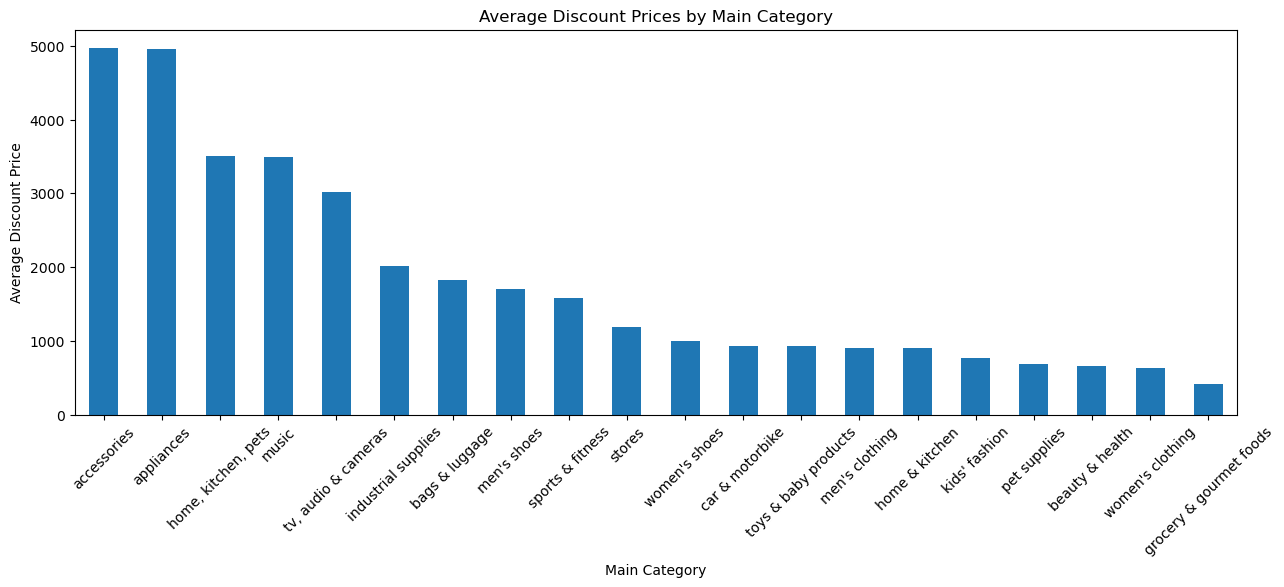

In [14]:
# Average discount price by main category
avg_discount_by_category = combined_df.groupby('main_category')['discount_price'].mean().sort_values(ascending=False)

# Plot the average discount price
avg_discount_by_category.plot(kind='bar', figsize=(15, 5))
plt.title("Average Discount Prices by Main Category")
plt.xlabel("Main Category")
plt.ylabel("Average Discount Price")
plt.xticks(rotation=45)
plt.show()


Average Discount Prices by Main Category
Highest Average Discount:
Accessories and Appliances lead with the highest average discounts (~₹5000), likely due to premium items like jewellery and large home appliances.
Lowest Average Discount:
Grocery & Gourmet Foods has the lowest average discount (~₹423), which aligns with the generally lower price points in this category.

In [15]:
# Combine key metrics into one DataFrame
category_summary = combined_df.groupby('main_category').agg({
    'ratings': 'mean',
    'no_of_ratings': 'sum',
    'discount_price': 'mean',
    'actual_price': 'mean'
}).sort_values(by='no_of_ratings', ascending=False)

# Rename columns for clarity
category_summary.columns = ['avg_rating', 'total_no_of_ratings', 'avg_discount_price', 'avg_actual_price']

# Display the summary
print("Category Summary:\n", category_summary)


Category Summary:
                          avg_rating  total_no_of_ratings  avg_discount_price  \
main_category                                                                  
tv, audio & cameras        3.874037          376675150.0         3018.188877   
stores                     3.953542           41940665.0         1184.124973   
appliances                 3.851212           36124728.0         4957.917838   
women's clothing           3.771603           27889654.0          632.179446   
toys & baby products       4.041152           27639936.0          926.019875   
accessories                3.944403           23242228.0         4968.208503   
beauty & health            4.025291           20926774.0          656.186158   
home & kitchen             3.979146           18902138.0          901.380320   
men's shoes                3.668780           12966634.0         1708.643421   
men's clothing             3.781225           10938596.0          902.589100   
sports & fitness     

Combined Metrics
Categories like TV, Audio & Cameras perform well in all metrics:
High average ratings (3.87).
High total ratings (~376M).
Significant average discounts (~₹3018).
Toys & Baby Products also stands out with high ratings (4.04) and moderate discounts (~₹926).

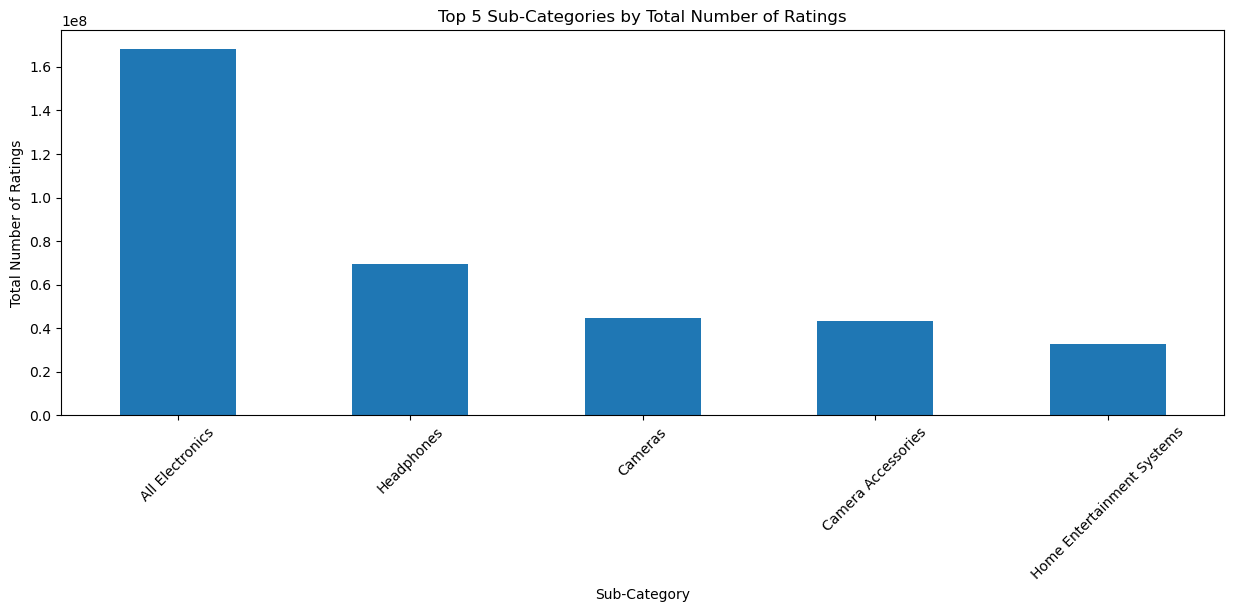

In [16]:
# Total number of ratings by sub category
top_subcategories = combined_df.groupby('sub_category')['no_of_ratings'].sum().sort_values(ascending=False).head(5)

# Plot the top subcategories
top_subcategories.plot(kind='bar', figsize=(15, 5))
plt.title("Top 5 Sub-Categories by Total Number of Ratings")
plt.xlabel("Sub-Category")
plt.ylabel("Total Number of Ratings")
plt.xticks(rotation=45)
plt.show()


Top Sub-Categories by Total Number of Ratings
All Electronics is by far the most popular sub-category, with the highest total number of ratings.
Other popular sub-categories include Headphones, Cameras, and Camera Accessories.

Further investigation - why home kitchen and pets categories have the lowest ratings?

In [17]:
# Filter for the category
low_rating_category = combined_df[combined_df['main_category'] == 'home, kitchen, pets']

# Average ratings by sub-category
avg_ratings_subcategory = low_rating_category.groupby('sub_category')['ratings'].mean().sort_values()
print("Average Ratings by Sub-Category in Home, Kitchen, Pets:\n", avg_ratings_subcategory)


Average Ratings by Sub-Category in Home, Kitchen, Pets:
 sub_category
Refurbished & Open Box    3.145833
Name: ratings, dtype: float64


Correlation between Ratings and Discount Price in Home, Kitchen, Pets:
                  ratings  discount_price
ratings         1.000000        0.176594
discount_price  0.176594        1.000000


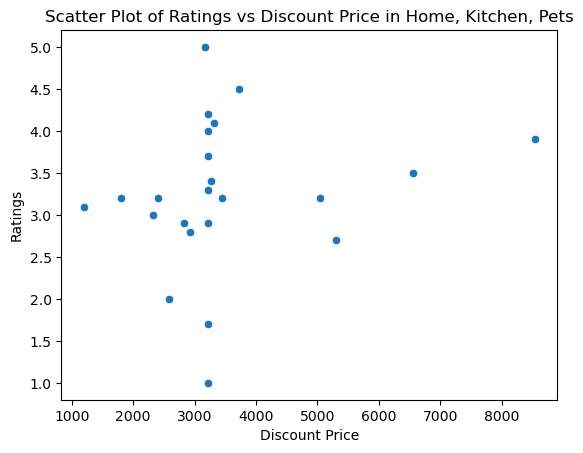

In [18]:
correlation = low_rating_category[['ratings', 'discount_price']].corr()
print("Correlation between Ratings and Discount Price in Home, Kitchen, Pets:\n", correlation)

sns.scatterplot(data=low_rating_category, x='discount_price', y='ratings')
plt.title('Scatter Plot of Ratings vs Discount Price in Home, Kitchen, Pets')
plt.xlabel('Discount Price')
plt.ylabel('Ratings')
plt.show()

In [19]:
# Poorly-rated products
poorly_rated_products = low_rating_category[low_rating_category['ratings'] <= 2.5].sort_values('ratings', ascending=True)
print("Poorly-Rated Products in Home, Kitchen, Pets:\n", poorly_rated_products[['name', 'ratings', 'discount_price', 'no_of_ratings']].head(10))


Poorly-Rated Products in Home, Kitchen, Pets:
                                                      name  ratings  \
428929  (Renewed) Havells Feasto 1350W 4 Slice Pop-up ...      1.0   
428938  (Renewed) Usha Heavy Weight Iron Heavy Weigt 1...      1.0   
951762  (Renewed) Havells Feasto 1350W 4 Slice Pop-up ...      1.0   
951771  (Renewed) Usha Heavy Weight Iron Heavy Weigt 1...      1.0   
428934  (Renewed) Crompton Solarium Qube 25 L Storage ...      1.7   
951767  (Renewed) Crompton Solarium Qube 25 L Storage ...      1.7   
428930  (Renewed) Hamilton Beach Metal 2 Slice Wide Sl...      2.0   
951763  (Renewed) Hamilton Beach Metal 2 Slice Wide Sl...      2.0   

        discount_price  no_of_ratings  
428929          3222.5            1.0  
428938          3222.5            1.0  
951762          3222.5            0.0  
951771          3222.5            0.0  
428934          3222.5            3.0  
951767          3222.5            0.0  
428930          2590.0            1.0  
95

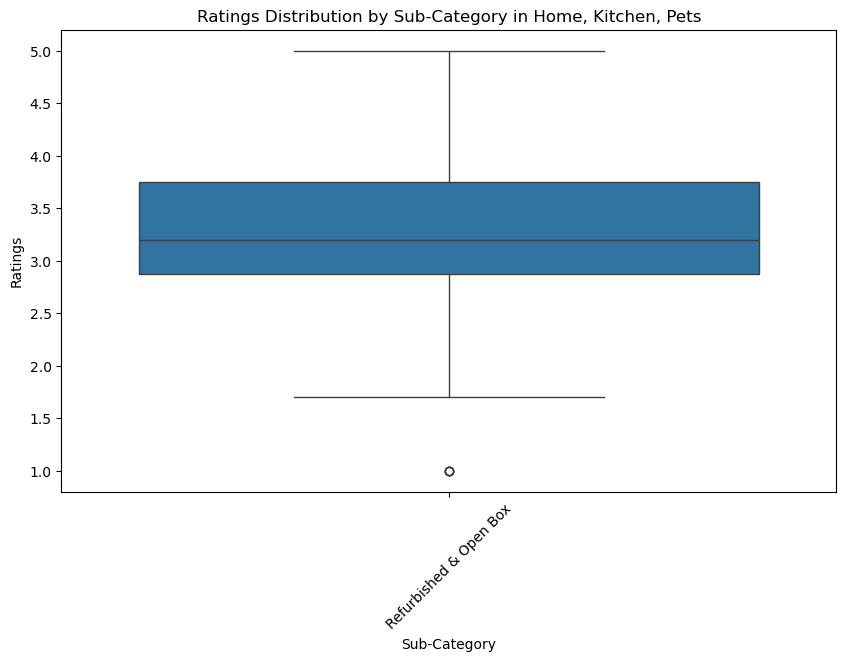

In [20]:
# Boxplot of ratings by sub-category
plt.figure(figsize=(10, 6))
sns.boxplot(data=low_rating_category, x='sub_category', y='ratings')
plt.title("Ratings Distribution by Sub-Category in Home, Kitchen, Pets")
plt.xlabel("Sub-Category")
plt.ylabel("Ratings")
plt.xticks(rotation=45)
plt.show()


Correlation Between Ratings and Number of Ratings in Home, Kitchen, Pets:
                 ratings  no_of_ratings
ratings        1.000000       0.170685
no_of_ratings  0.170685       1.000000


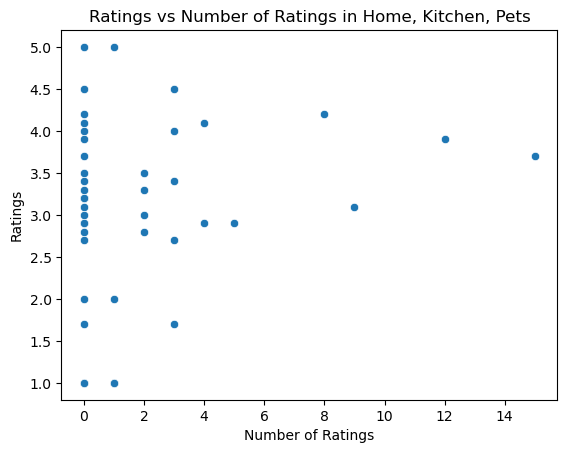

In [21]:
# Correlation between ratings and number of ratings
correlation_engagement = low_rating_category[['ratings', 'no_of_ratings']].corr()
print("Correlation Between Ratings and Number of Ratings in Home, Kitchen, Pets:\n", correlation_engagement)

# Scatter plot to visualise relationship
sns.scatterplot(data=low_rating_category, x='no_of_ratings', y='ratings')
plt.title("Ratings vs Number of Ratings in Home, Kitchen, Pets")
plt.xlabel("Number of Ratings")
plt.ylabel("Ratings")
plt.show()


Insights:
The Refurbished & Open Box sub-category is the only sub-category under Home, Kitchen, Pets, with an average rating of 3.14.

A weak positive correlation (0.176) exists between ratings and discount_price.

Most poorly rated products are renewed/refurbished items, such as:
Pop-up toasters
Irons
Storage water heaters

Weak positive correlation (0.171) between ratings and no_of_ratings.
Products with higher ratings tend to have slightly more reviews, but the effect is minimal.
Many poorly rated products have few to no reviews, indicating potential data sparsity or niche items.

## Feature Engineering

In [22]:
# product level features
combined_df['discount_percentage'] = ((combined_df['actual_price'] - combined_df['discount_price']) / combined_df['actual_price']) * 100
combined_df['price_to_rating'] = combined_df['discount_price'] / combined_df['ratings']

In [23]:
# category level features
category_avg_ratings = combined_df.groupby('main_category')['ratings'].transform('mean')
combined_df['category_avg_ratings'] = category_avg_ratings

category_avg_discount = combined_df.groupby('main_category')['discount_price'].transform('mean')
combined_df['category_avg_discount'] = category_avg_discount

In [24]:
# engagement features - customer
combined_df['engagement_score'] = combined_df['ratings'] * combined_df['no_of_ratings']

# text features
combined_df['name_length'] = combined_df['name'].apply(len)

In [25]:
# outlier flags
high_value_threshold = combined_df['discount_price'].quantile(0.99)
combined_df['is_high_value'] = combined_df['discount_price'] > high_value_threshold

# low-rated products
combined_df['is_low_rated'] = combined_df['ratings'] < 2.5

In [26]:
# Fill missing values only in numeric columns
numeric_columns = combined_df.select_dtypes(include=['float64', 'int64']).columns
combined_df[numeric_columns] = combined_df[numeric_columns].fillna(combined_df[numeric_columns].median())

## building a hybrid recommendation system with both content-based filtering and collaborative-filtering

In [27]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# Step 1: Select Features
features = ['discount_price', 'ratings'] + [col for col in combined_df.columns if col.startswith('main_category_') or col.startswith('sub_category_')]

# Step 2: Scale Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_df[features])

# Step 3: Fit Nearest Neighbours Model
nearest_neighbors = NearestNeighbors(n_neighbors=10, metric='cosine', algorithm='auto')
nearest_neighbors.fit(scaled_features)

# Step 4: Recommendation Function
def recommend_similar_products_approx(product_index, top_n=5):
    # Get the indices of the top similar products
    distances, indices = nearest_neighbors.kneighbors([scaled_features[product_index]], n_neighbors=top_n+1)
    # Return the top similar products (excluding the query product itself)
    return combined_df.iloc[indices[0][1:]][['name', 'ratings', 'discount_price']]


In [51]:
import faiss
import numpy as np

# Step 1: Create user-product interaction matrix
user_product_matrix = combined_df.pivot_table(index='name', columns='product_name', values='ratings').fillna(0)
user_product_np = user_product_matrix.values.astype('float32')

# Ensure the array is C-contiguous
user_product_np = np.ascontiguousarray(user_product_np)

# Step 2: Build Faiss Index for cosine similarity
faiss_index = faiss.IndexFlatIP(user_product_np.shape[1])  # Inner product (cosine similarity)
faiss.normalize_L2(user_product_np)  # Normalize for cosine similarity
faiss_index.add(user_product_np)

# Step 3: Recommendation Function
def recommend_for_user_faiss(user_index, top_n=5):
    # Query the user vector
    user_vector = user_product_np[user_index:user_index+1]
    user_vector = np.ascontiguousarray(user_vector)  # Ensure query vector is C-contiguous
    
    # Normalize the user vector for cosine similarity
    faiss.normalize_L2(user_vector)
    
    # Search for top_n similar users
    distances, indices = faiss_index.search(user_vector, top_n + 1)  # Search for top_n + 1
    
    # Exclude the user itself (self-match)
    similar_users = indices.flatten()[1:top_n + 1]
    weights = distances.flatten()[1:top_n + 1]  # Similarity scores as weights
    
    # Get weighted product recommendations
    similar_ratings = user_product_matrix.iloc[similar_users]
    weighted_scores = (similar_ratings.T * weights).T.sum(axis=0) / weights.sum()
    recommended_products = weighted_scores.sort_values(ascending=False).index[:top_n]
    
    return recommended_products

# Example usage
user_index = 0  # Replace with the index of the user you want recommendations for
recommendations = recommend_for_user_faiss(user_index, top_n=5)
print("Recommended Products:", recommendations)


Recommended Products: Index(['All Appliances', 'Amazon-Products', 'Kitchen and Home Appliances',
       'International Toy Store', 'Janitorial and Sanitation Supplies'],
      dtype='object', name='product_name')


In [59]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import faiss

# Step 1: Remove Duplicates from the Dataset
combined_df = combined_df.drop_duplicates(subset='name', keep='first').reset_index(drop=True)

# Step 2: Content-Based Filtering (CBF)
# Select Features
features = ['discount_price', 'ratings'] + [col for col in combined_df.columns if col.startswith('main_category_') or col.startswith('sub_category_')]

# Scale Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_df[features])

# Fit Nearest Neighbours Model
nearest_neighbors = NearestNeighbors(n_neighbors=10, metric='cosine', algorithm='auto')
nearest_neighbors.fit(scaled_features)

def get_content_based_scores(product_index, top_n=5):
    distances, indices = nearest_neighbors.kneighbors([scaled_features[product_index]], n_neighbors=top_n+1)
    scores = 1 - distances.flatten()  # Convert distances to similarity scores
    return indices.flatten()[1:], scores[1:]  # Exclude self-match

# Step 3: Collaborative Filtering (CF)
# Create User-Product Interaction Matrix
user_product_matrix = combined_df.pivot_table(index='name', columns='product_name', values='ratings').fillna(0)
user_product_np = user_product_matrix.values.astype('float32')
user_product_np = np.ascontiguousarray(user_product_np)  # Ensure C-contiguous

# Build Faiss Index for Collaborative Filtering
faiss_index = faiss.IndexFlatIP(user_product_np.shape[1])  # Inner product (cosine similarity)
faiss.normalize_L2(user_product_np)  # Normalize for cosine similarity
faiss_index.add(user_product_np)

def get_collaborative_scores(user_index, top_n=5):
    user_vector = user_product_np[user_index:user_index+1]
    user_vector = np.ascontiguousarray(user_vector)
    faiss.normalize_L2(user_vector)  # Normalize query vector
    distances, indices = faiss_index.search(user_vector, top_n + 1)
    scores = distances.flatten()[1:]  # Exclude self-match
    return indices.flatten()[1:], scores

# Step 4: Hybrid Recommendation System
def hybrid_recommendations(user_index, product_index, top_n=5, alpha=0.7, max_per_category=2):
    # Get Content-Based Filtering (CBF) Scores
    cb_indices, cb_scores = get_content_based_scores(product_index, top_n=top_n)

    # Get Collaborative Filtering (CF) Scores
    cf_indices, cf_scores = get_collaborative_scores(user_index, top_n=top_n)

    # Combine Scores
    combined_scores = {}
    for idx, score in zip(cb_indices, cb_scores):
        combined_scores[idx] = combined_scores.get(idx, 0) + alpha * score  # Weight CBF scores
    
    for idx, score in zip(cf_indices, cf_scores):
        combined_scores[idx] = combined_scores.get(idx, 0) + (1 - alpha) * score  # Weight CF scores

    # Penalise Over-Represented Categories
    sub_category_counts = combined_df['sub_category'].value_counts()
    sub_category_penalty = {cat: 1 / (1 + np.log1p(count)) for cat, count in sub_category_counts.items()}
    for idx in combined_scores:
        category = combined_df.iloc[idx]['sub_category']
        combined_scores[idx] *= sub_category_penalty.get(category, 1)

    # Rank Products by Combined Scores
    ranked_products = sorted(combined_scores.items(), key=lambda x: (x[1], combined_df.iloc[x[0]]['ratings']), reverse=True)
    top_indices = [item[0] for item in ranked_products]

    # Add Diversity by Limiting Products Per Category
    diversified_recommendations = []
    category_counts = {}
    for idx in top_indices:
        category = combined_df.iloc[idx]['sub_category']
        if category_counts.get(category, 0) < max_per_category:
            diversified_recommendations.append(idx)
            category_counts[category] = category_counts.get(category, 0) + 1
        if len(diversified_recommendations) == top_n:
            break

    # Return Top Diversified Recommendations
    return combined_df.iloc[diversified_recommendations][['name', 'ratings', 'discount_price']]


# Step 5: Test the Hybrid Recommendation System
user_index = 0  # Replace with the user index
product_index = 10  # Replace with the product index
recommendations = hybrid_recommendations(user_index, product_index, top_n=5, alpha=0.7, max_per_category=2)
print("Hybrid Recommendations:\n", recommendations)


Hybrid Recommendations:
                                                      name  ratings  \
10      Daikin 1 Ton 3 Star Inverter Split AC (Copper,...      4.2   
52      Lloyd 1.5 Ton 5 Star Fixed Speed Window Ac (Co...      4.2   
259115  MLX90640 USB Power Supplys 1.8 Inch TFT Displa...      4.0   
11047   OnePlus 126 cm (50 inches) Y Series 4K Ultra H...      4.2   
12217   Redmi 126 cm (50 inches) 4K Ultra HD Android S...      4.2   

        discount_price  
10             32990.0  
52             32999.0  
259115         15143.0  
11047          32999.0  
12217          32999.0  


In [61]:
recommendations = hybrid_recommendations(user_index, product_index, top_n=5, alpha=0.7, max_per_category=1)
print("Recommendations with Increased Sub-Category Diversity:\n", recommendations)

Recommendations with Increased Sub-Category Diversity:
                                                      name  ratings  \
10      Daikin 1 Ton 3 Star Inverter Split AC (Copper,...      4.2   
259115  MLX90640 USB Power Supplys 1.8 Inch TFT Displa...      4.0   
11047   OnePlus 126 cm (50 inches) Y Series 4K Ultra H...      4.2   

        discount_price  
10             32990.0  
259115         15143.0  
11047          32999.0  


## Prepare the FAISS model for deployment

In [70]:
faiss.write_index(faiss_index, "faiss_index.bin")

np.save("user_product_matrix.npy", user_product_np)